<a href="https://colab.research.google.com/gist/kiwamizamurai/005b12a9b372ab86ae094647f361b950/variational-bayes-univariate-gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg as LA
from scipy import stats
from scipy.special import digamma
sns.set()

plt.rcParams["figure.figsize"] = (18, 9)
plt.rcParams["font.size"] = 25

In [0]:
N = 20
sigma = 0.5
# tau is 4.0
mu = 0.2

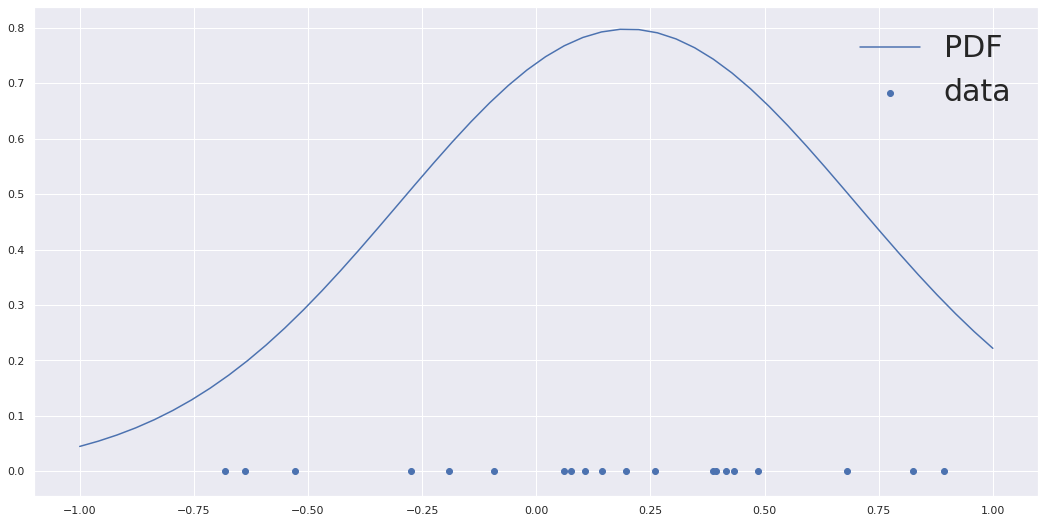

In [65]:
x = np.linspace(-1, 1)
y = stats.norm(mu, sigma).pdf(x)
plt.plot(x, y, label='PDF')
data_x = np.random.normal(mu, sigma, N)
data_y = np.zeros(N)
plt.scatter(data_x, data_y, label="data")
plt.legend(frameon=False, loc=0, ncol=1, prop={'size': 30})

In [0]:
def posterior(mu, tau):
  # scale = 1.0 / lambda
  return stats.norm(mu_N, np.sqrt(1/tau_N)).pdf(mu) * stats.gamma.pdf(tau, a_N, 0, 1/b_N)

In [0]:
E_tau = 1.
tau_0 = 0.
mu_0 = 0.
a_0 = 0.
b_0 = 0.
kappa_0 = 0.

mu_N = (kappa_0*mu_0 + np.sum(data_x))/(N + kappa_0)
a_N = a_0 + (N+1)/2.

X, Y = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(0.1, 8, 100))

[+] ITERATION: 0
tau_N: 20.00
b_N:   2.41
E_tau: 4.35
[+] ITERATION: 1
tau_N: 86.98
b_N:   2.03
E_tau: 5.17
[+] ITERATION: 2
tau_N: 103.48
b_N:   2.01
E_tau: 5.22
[+] ITERATION: 3
tau_N: 104.42
b_N:   2.01
E_tau: 5.22


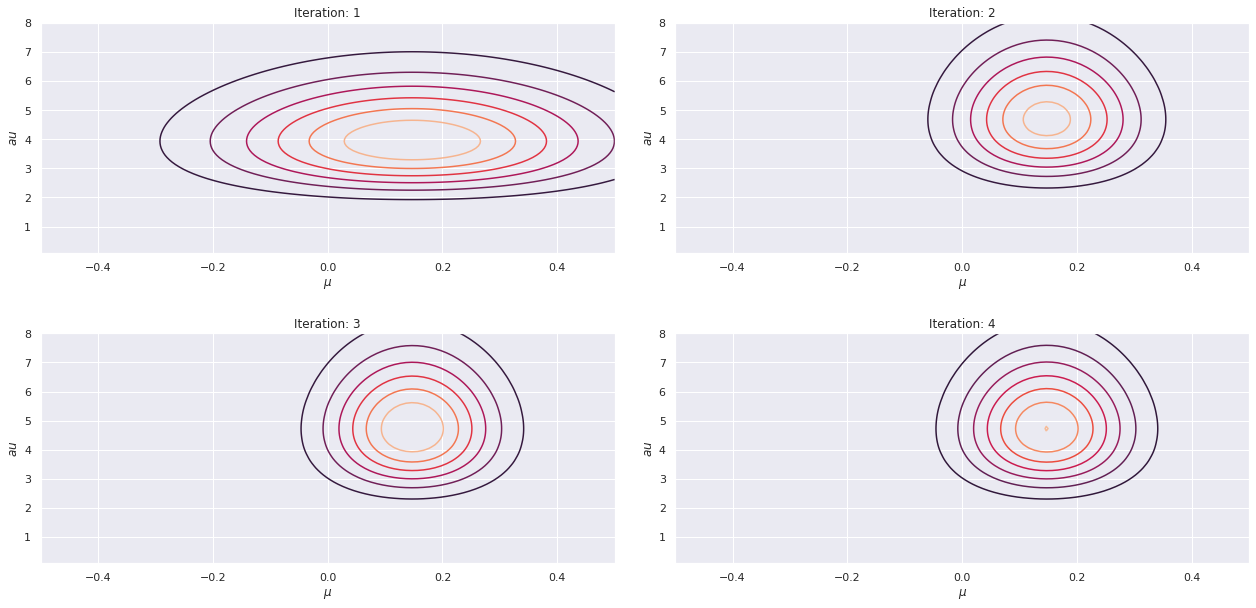

In [68]:
for i in range(4):
  print('[+] ITERATION: {}'.format(i))
  tau_N = (kappa_0 + N)*E_tau
  term_kappa = (kappa_0/2)*(mu_N**2 + 1/tau_N + mu_0**2)
  term_sigma = 0.5*(np.sum(data_x**2) + N*(mu_N**2 + 1/tau_N)) - mu_N*np.sum(data_x)
  b_N = b_0 + term_kappa - 2*mu_N*mu_0 + term_sigma
  E_tau = a_N/b_N
  print('tau_N: {0:.2f}'.format(tau_N))
  print('b_N:   {0:.2f}'.format(b_N))
  print('E_tau: {0:.2f}'.format(E_tau))

  Z = np.vectorize(posterior)(X, Y)
  plt.subplot(2, 2, i+1)
  plt.contour(X, Y, Z)
  plt.title("Iteration: {}".format(i+1))
  plt.xlabel(u"$\mu$")
  plt.ylabel(u"$\tau$")
  plt.tight_layout()

## References

- https://kaybrodersen.github.io/talks/Brodersen_2013_03_22.pdf
- https://qiita.com/kento1109/items/99a6bcbf18c1119d127c
- https://xyang35.github.io/2017/04/14/variational-lower-bound/
- https://www.colorado.edu/ASEN/asen5227_offline/slides/292-334.pdf
- http://www.math.kobe-u.ac.jp/HOME/higuchi/h18kogi/sect4.pdf
- https://www.iist.ac.in/sites/default/files/people/COVMain.pdf
- http://bjlkeng.github.io/posts/variational-bayes-and-the-mean-field-approximation/
- https://www.slideshare.net/takao-y/ss-28872465
- https://en.wikipedia.org/wiki/Normal_distribution}